### Monty Hall / Snakes & Rabbits

From ITHS, Python Course, E04, Task 7

There are three identical doors, behind two of them, there are ferocious snakes and behind one of them is a cute little rabbit. Your aim is to pick a door and get the cute rabbit. You start picking one door randomly and suddenly another door opens and snake slither away pssss. Now you have a choice to either stay with your door or change to the remaining door.

  a) What is your choice and why? (**)

  b) Randomly assign which door has the rabbit, and randomly pick an initial door. Now simulate 10, 100, 1000, 10000, 100000, 1000000 times for staying and for switching doors. Calculate the proportion of finding the rabbits for each set of simulations. Plot the results.

In [ ]:
# Card example to better understand probability

'''

Instead of a rabbit next to either one or two snake(s),
we try to find a certain card in a deck, say Queen of Hearts.

You draw a card but cannot see it. The odds of drawing Queen of Hearts is 1/52.
The dealer then draws a random card from the deck and puts it face up on the table,
but it can never be the Queen of Hearts!

The deck now contain 50 cards. Your hand has 1. On the table there is 1 (!= Queen of Hearts).
There's a 1/52 chance that the Queen is in your hand, but the 51 out of 52 times it isn't =>
THEN it's 1/50 that the Queen is in the deck.

So you either take the odds 1/52 or 1/52 + 1/50. The answer is obvious. And now intuitively, the Monty Hall problem
should make a bit more sense.

'''


This was a very interesting task because it questioned my concepts of <i>choice</i> and <i>randomness.</i> It's also an exiting task, becaue we get to run simulations of well documented human decisions. (Let's Make a Deal, american game show) Also a great practice of learning to diregard data.

## How I first approached it:

"We need to understand the difference in plain and hidden data. The game has two different POVs - I'm going to name the player Agent."

What the Agent sees:
## 🚪 🚪 🚪

1. Game state generation.

Possible positions:

|game state|1  |2  |3  |
|:--|:--|:--|:--|
|pos1| 🐇| 🐍| 🐍|
|pos2| 🐍| 🐇| 🐍|
|pos3| 🐍| 🐍| 🐇|

Although nothing is incorrect yet, it's definitely the wrong approach.It's very redundant and I'm going to explain why.

## How I understand it now:

In this scenario it **doesn't really matter** if snakes are behind the doors as they don't change anything and just slither away pssss...

Secondly, the positions **doesn't matter at all**. It's an (inconvenient) visualisation.

Thirdly the initial door selection **shouldn't be considered meaningful**, since it always has to be made (with the same odds) to progress the game. You could think of this as a flag variable.

Once the winning and the selected door's been set (both randomised integers, 1,3 (flag set)), all we have to do is declare which doors are legal, randomise opening (if possible), and then use the bool of switch to either (0) open selected or (1) switch to legal door.

We could write this as possible_doors. Since we want to create entities with similar but never identical properties, we can use set theory. (Note for Python syntax: Data type 'set' != 'dictionary', (both use curly bracket but ain't the same!!)). So,

possible_door = {1,2,3}

A = selected door
B = winning door
if A !=  B, opening A is legal and gets passed to possible_door
else 
doors_to_open = A if A != B OR 

To plot correctly, we need to call the simulation function multiple times with different iteration values. Each time we append every win to a list, this list contains the value of every win within that loop. Then we pass that list on to another list to store total wins among the total wins of the other loops. (There's probably a better way...)

Running simulation 1 times. switch=True. wins=1 percentage_to_win=100.0
Running simulation 1 times. switch=False. wins=1 percentage_to_win=100.0
Running simulation 10 times. switch=True. wins=5 percentage_to_win=50.0
Running simulation 10 times. switch=False. wins=2 percentage_to_win=20.0
Running simulation 100 times. switch=True. wins=71 percentage_to_win=71.0
Running simulation 100 times. switch=False. wins=39 percentage_to_win=39.0
Running simulation 1000 times. switch=True. wins=655 percentage_to_win=65.5
Running simulation 1000 times. switch=False. wins=316 percentage_to_win=31.6
Running simulation 10000 times. switch=True. wins=6634 percentage_to_win=66.34
Running simulation 10000 times. switch=False. wins=3380 percentage_to_win=33.8
Running simulation 100000 times. switch=True. wins=66671 percentage_to_win=66.67
Running simulation 100000 times. switch=False. wins=33233 percentage_to_win=33.23
Running simulation 1000000 times. switch=True. wins=666370 percentage_to_win=66.64
Runn

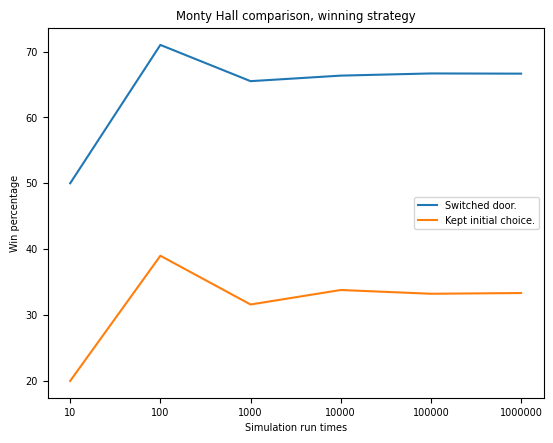

In [65]:
"""
https://github.com/vcrn/monty-hall-problem-simulator

vcrn sent me their solution. Great guy - and great code. I also learned about the XOR ^ operator and YOOO HOW TO IMPLEMENT SET THEORY LESS GO
Symmetric difference in set theory is bascially the same thing as XOR in Python. (Please correct me if I'm wrong!)

"""

import random
import matplotlib.pyplot as plt

# Takes one argument (switch).
def monty_hall_sim(times: int, switch: bool):  # Takes times and switch args
    wins = 0
    for i in range(times):
        # Since sets are unordered and allows no duplicate, we can compare them in response to door choice.
        possible_doors = {1,2,3}

        # Same as previous, we use a random integer to select door.
        selected_door = random.randint(1,3)

        # Same as previous, we select game state at random.
        winning_door = random.randint(1,3)

        # Using XOR to prevent the Rabbit door to be opened. Symmetric difference!
        doors_to_open = possible_doors ^ {winning_door,
                                          selected_door}
    
        # Chooses door at random if Rabbit door is selected.
        open_door = random.choice(tuple(doors_to_open)) 

        # Switches to possible door or selects chosen door.
        (switch_door,) = possible_doors ^ {open_door,
                                           selected_door}

        # Using boolean with multiple conditions
        if switch and switch_door == winning_door:
            wins +=1
        elif not switch and selected_door == winning_door:
            wins +=1
    
    percentage_to_win = round(100 * wins / tries,2)
    print(f"Running simulation {times} times. {switch=}. {wins=} {percentage_to_win=}")
    if switch == True:
        list_append(rabbits_found_switch,percentage_to_win)
    else:
        list_append(rabbits_found_no_switch,percentage_to_win)

def list_append(lst, item):
  lst.append(item)
  return lst

if __name__ == "__main__":
    rabbits_found_switch = []
    rabbits_found_no_switch = []

    for i in range(7):
        tries = 10**i ##  How to make this loop work without having to pop first
        monty_hall_sim(tries, True)
        monty_hall_sim(tries, False)
    rabbits_found_switch.pop(0) # workaround becaue of tries being variable in loop (i)
    rabbits_found_no_switch.pop(0) 

## Plot with matplotlib

plt.rcParams.update({'font.size': 7})
plt.plot(rabbits_found_switch, label="Switched door.")
plt.plot(rabbits_found_no_switch, label="Kept initial choice.")
plt.xticks([0,1,2,3,4,5], [10, 100, 1000, 10000, 100000, 1000000])
plt.ylabel("Win percentage")
plt.xlabel("Simulation run times") # Better name for this?
plt.legend(loc="center right")
plt.title("Monty Hall comparison, winning strategy")

print(
    f"Percentage {rabbits_found_switch=} \n"
    f"Percentage {rabbits_found_no_switch=}/100 \n")